# Network training

## 1. Softmax

Итак мы выяснили как тренировать нашу нейронную сеть когда мы делаем предсказание регрессии или классификации на один класс, а что если классов несколько, например набор данных MNIST содержит 10 классов, по одному на каждую из цифр

В этом случае, во-первых мы будем иметь несколько выходов из нашей сети, по одному на каждый класс

<img src="img/dense.png" style="background-color:white;">

Понятно что выходы могут иметь любое выходное значение, в зависимости от весов сети, однако мы хотели бы получить распеределение вероятностей для каждого из классов.

Тогда нам нужно нормализовать выходы, чтобы их сумма равнялась 1, делают это с помощью Softmax

$$\large{S(z_j) =  \frac{e^{z_j}}{\sum_{i}^{C} e^{z_i}}}$$

Где j - индекс искомого класса, C - количество классов в датасете

Давайте рассмотрим градиент этой функции по z_k

Для простоты вычислений воспользуемся небольшим трюком:

$$\large{\frac{\partial log(f(x))}{\partial x} = \frac{\partial f(x)}{\partial x} \frac{1}{f(x)}}$$

$$\large{f(x)\frac{\partial log(f(x))}{\partial x} = \frac{\partial f(x)}{\partial x}}$$

Раскроем логарифм поверх Softmax

$$\large{log(S(z_j))} = log(\frac{e^{z_j}}{\sum_{i}^{C} e^{z_i}}) = z_j - log(\sum_{i}^{C} e^{z_i})))$$

Производная от z_j равна 1 если j == k, иначе она равна нулю, запишем это через индексную функцию

$$\large{\frac{\partial log(S(z_j))}{\partial z_k} = \mathbb{1}[k == j] - \frac{\partial log(\sum_{i}^{C} e^{z_i}))}{\partial z_k}}$$

Производная под логарифмом не нулевая только $e^{z_k}$

$$\large{\frac{\partial log(S(z_j))}{\partial z_k} = \mathbb{1}[k == j] - \frac{e^{z_k}}{\sum_{i}^{C} e^{z_i}}}$$

Заметим что справа у нас опять стоит Softmax только на этот раз от k

$$\large{\frac{\partial log(S(z_j))}{\partial z_k} = \mathbb{1}[k == j] - S(z_k)}$$

Возвратим градиент функции по трюку которым мы воспользовались

$$\large{\frac{\partial S(z_j)}{\partial z_k} = S(z_j)(\mathbb{1}[k == j] - S(z_k))}$$


$$
\large{\frac{\partial S(z_j)}{\partial z_k} = 
\begin{equation}
    \begin{cases}
      S(z_j)(1 - S(z_j)), & \mbox{if k==j}\\
      -S(z_j)S(z_k), & \mbox{if k!=j}
    \end{cases}\,.
\end{equation}
}
$$


## 2. Cross Entropy

Однако, нам так же нужно обновить и функцию потерь на многоклассовый случай. Воспользуемся выводами из BCE и применим их на многоклассовый выход

В данном случае $y_i$ будет OHE вектором класса

$$\large{L = -\sum_i^C y_i log(S(z_i))}$$

Давайте посмотрим на градиент этой функции

$$\large{\frac{\partial L}{\partial z_k} = -\sum_i^C y_i \frac{\partial log(S(z_i))}{\partial z_k}}$$

$$\large{\frac{\partial L}{\partial z_k} = -\sum_i^C y_i \frac{\partial S(z_i)}{\partial z_k} \frac{1}{S(z_i)}}$$

Градиент по softmax мы вычислили ранее

$$\large{\frac{\partial L}{\partial z_k} = -\sum_i^C y_i S(z_i) (\mathbb{1}[k == i] - S(z_k)) \frac{1}{S(z_i)}}$$

$$\large{\frac{\partial L}{\partial z_k} = -\sum_i^C y_i (\mathbb{1}[k == i] - S(z_k))}$$

$$\large{\frac{\partial L}{\partial z_k} = -\sum_i^C \mathbb{1}[k == i] y_i +\sum_i^C S(z_k) y_i}$$

$$\large{\frac{\partial L}{\partial z_k} = -y_k + S(z_k) \sum_i^C y_i}$$

Воспользуймся фактом что сумма OHE векторов всех классов равна единичному

$$\large{\frac{\partial L}{\partial z_k} = S(z_k) - y_k}$$

Часто для удобства вычислений градиента Cross Entropy объеденяют с Softmax в одну функцию

## 3. Градиентный спуск

Вспомним как бы делали градиентный спуск в модели линейной регресии, мы расчитывали функцию потерь для всех входящих векторов и суммировали их

Градиентный спуск был достаточно медленным алгоритмом, однако он хорошо искал минимум фукнции

С другой стороны мы знаем про стохастический градиентный спуск, когда мы выбираем случайный вектор и считаем функцию потерь относительно него

Стохастический градиентный спуск был очень быстрым алгоримом, но не всегда искал хороший минимум

В данном курсе мы будем пользоваться средним вариантом Batch Gradient Descent - когда мы выбираем несколько случайных векторов и считаем функцию потерь относительно них

<img src="img/bgd.jpeg">



## 4. Оптимизация градиентного спуска

### 4.1 Momentum

![without_momentum](img/without_momentum.gif "without_segment")
![with_momentum](img/with_momentum.gif "with_segment")

Идея данной оптимизации состоит в том что мы сохраняем направление предыдущего шага и новый шаг делаем учитывая старое направление, таким образом мы уменьшаем влияние шумных признаков на оптимизацию

$$\large{\upsilon_t = \gamma \upsilon_{t-1} + \eta \nabla_{W} J(W)}$$
$$\large{W = W - \upsilon_t}$$

$\gamma$ - гиперпараметр алгорима, чем он больше, тем сильнее учитывается направление предыдущего шага, обычно $\gamma = 0.9$

Визуально можно представить шарик катящийся с горки по неровной дороге, он переодически отклоняется то влево то вправо, однако основное ускорение направленно вниз

### 4.2 Nesterov accelerated gradient

У метода momentum есть существенный недостаток, то что мы можем проскочить точку оптимума из-за того что двигались слишком быстро в направлении предыдущего шага, попробуем это решить 

$$\large{\upsilon_t = \gamma \upsilon_{t-1} + \eta \nabla_{W} J(W - \gamma \upsilon_{t-1})}$$
$$\large{W = W - \upsilon_t}$$

![nesterov](img/nesterov_update_vector.png)

Итак momentum считает направление текущего градиента (маленький синий вектор), а после делает большой скачок в направлении предыдущего шага (большой коричневый вектор)

NAG в свою очередь сначала делает скачок в направлении предущего шага, а после корректирует его (маленький красный вектор), что дает зеленый вектор

Теперь, когда мы можем адаптировать наши обновления к наклону нашей функции ошибок и ускорить SGD, мы также хотели бы адаптировать наши обновления к каждому отдельному параметру, чтобы делать обновления в зависимости от их важности параметра.

### 4.3 Adagrad

Adagrad — это алгоритм оптимизации, который делает именно то что мы хотели: адаптирует скорость обучения к параметрам, выполняя небольшие обновления для параметров которые встречаются часто, и более крупные обновления для редко встречаемых параметров. Он делает это оптимизируя скорость обучения под параметры

Итак определим $g_{t, i}$ как градиент в момент времени t для функции потерь по параметру сети i:

$$\large{g_{t,i} = \nabla_WJ(W_{t,i})}$$

Тогда обновления параметра сети в момент времени t, для SGD:

$$\large{W_{t+1,i} = W_{t,i} - \eta g_{t +1, i}}$$

Правило обновления параметров Adagrad изменяет скорость обучения на каждом шаге обновления, для каждого параметра, базируесь на прошлом значении градиента параметра:

$$\large{\theta_{t+1,i} = \theta_{t,i} - \frac{\eta}{\sqrt{G_{t,ii} + \epsilon}} g_{t, i}}$$

$G_{t,ii} \in R ^ {d x d}$ -диагональная матрица где на диагонали находится сумма квадратов параметров $W_i$ в момент времени t, $\epsilon$ - небольшая константа чтобы избежать деления на ноль, обычно 1e-8

Чтобы избавится от номера параметра i перепишем в матричном виде

$$\large{\theta_{t+1} = \theta_{t} - \frac{\eta}{\sqrt{G_{t} + \epsilon}} \bigodot g_{t}}$$

$\bigodot$ - матрично-векторное произведение

Главный недостаток Adagrad это накопление суммы градиента в знаменателе и чем дальше по времени мы движемся, тем более несущественными становятся наши обновления

### 4.4 Adadelta

Adadelta - это улучшение Adagrad призванное уменьшить слишком быстрое снижение скорости обновления, adadelta сужает аккумулирование градиента вместо всей временной шкалы до окна $\omega$

Вместо неэффективного хранения значений $\omega$ сумм предыдущих квадратов градиентов, мы будем считать экспонентоциальное среднее значений $E[g^2]_t$, в такой постановке наше значение $E[g^2]_t$ опирается лишь на текущий градиент и предыдущее значение:

$$\large{E[g^2]_{t} = \gamma E[g^2]_{t - 1} + (1 - \gamma) g^2_t}$$

Мы будем использовать $\gamma$ близкую к значение в momentum (около 0.9)

Перепишем обновление SGD через $\Delta W_t$

$$\large{\Delta W_t} = -\eta g_t$$

$$\large{W_{t+1}} = W_t + \Delta W_t$$

В Adagrad мы определили $\Delta W_t$ как 

$$\large{\Delta W_t} = - \frac{\eta}{\sqrt{G_{t} + \epsilon}} \bigodot g_{t}$$

Теперь вместо $G_t$ мы используем $E[g^2]_t$

$$\large{\Delta W_t} = - \frac{\eta}{\sqrt{E[g^2]_t + \epsilon}} g_{t}$$

Заметим что знаменатель это RMSE

$$\large{\Delta W_t} = - \frac{\eta}{RMS[g_t]} g_{t}$$

Авторы отмечают что в этом методе (а так же всех предыдущих), единицы величины части обновления отличаются от единиц параметра, чтобы исправить это они предложили высчитывать экспонентоциальное среднее изменения параметра а не самих параметров

$$\large{E[\Delta W^2]_{t} = \gamma E[\Delta W^2]_{t - 1} + (1 - \gamma) \Delta W^2_t}$$

$$\large{RMS[\Delta W_t] = \sqrt{E[\Delta W^2]_{t} + \epsilon}}$$

Поскольку $RMS[\Delta W_t]$ нам неизвестен на шаге t мы апроксимируем его через RMS от обновления параметров на предыдущем шаге. Замета $\eta$ в формуле обновления наконец то даст нам Adadelta

$$\large{\Delta W_t} = - \frac{RMS[\Delta W_{t-1}]}{RMS[g_t]} g_{t}$$

$$\large{W_{t+1}} = W_t + \Delta W_t$$


### 4.5 RMSprop

RMSprop — это неопубликованный метод адаптивной скорости обучения.

RMSprop и Adadelta были разработаны независимо друг от друга примерно в одно и то же время из-за необходимости решить проблему радикального снижения скорости обучения в Adagrad. Фактически RMSprop идентичен первому вектору обновления Adadelta, который мы получили выше:

$$\large{E[g^2]_{t} = \gamma E[g^2]_{t - 1} + (1 - \gamma) g^2_t}$$

$$\large{W_t} = W_t - \frac{\eta}{\sqrt{E[g^2]_t + \epsilon}} g_{t}$$

### 4.6 Adam

Adaptive Moment Estimation (Adam) — это еще один метод, который вычисляет скорость адаптивного обучения для каждого параметра. В дополнение к хранению экспоненциально затухающих средних значений прошлых квадратов градиентов $\upsilon_t$ подобно Adadelta и RMSprop, Адам также хранит экспоненциально затухающие средние значения прошлых градиентов.

$$\large{m_t = \beta_1 m_{t-1} + (1 - \beta_1)g_t}$$
$$\large{\upsilon_t = \beta_2 \upsilon_{t-1} + (1 - \beta_2)g^2_t}$$

$m_t$ и $\upsilon_t$ приближают первый момент (среднее) и второй момент (смещенную дисперсию) параметров соотвественно

Поскольку $m_t$ и $\upsilon_t$ инициализируются как нулевые вектора, у нас имеется проблема что при больших значениях $\beta_1$ и $\beta_2$ $m_t$ и $\upsilon_t$ в начальных шагах близки к нулю

Поэтому будем использовать их исправленные версии

$$\large{\hat{m_t} = \frac{m_t}{1 - \beta_1}}$$
$$\large{\hat{\upsilon_t} = \frac{\upsilon_t}{1 - \beta_2}}$$

Правило обновления схоже с Adadelta и RMSProp

$$\large{W_{t+1} = W_t - \frac{\eta}{\sqrt{\hat{\upsilon_t}} + \epsilon}\hat{m_t}}$$

Авторы метода рекомендуют использовать параметры $\beta_1 = 0.9$, $\beta_2 = 0.999$ и $\epsilon = 1e-8$

## 5. Инициализация весов

Итак мы знаем как оптимизировать обучение нейронной сети, как текут градиенты и как решать задачи классификации и регрессии, но что же делать с весами

Стандарная инициализация 0 не очень хороша, поскольку начальные градиенты будут занулятся и мы будем начинать обучение достаточно долго

Другой вариант инициализировать весами из нормального распределения с нулевым смещением и какой дисперсией, данный вариант гораздо лучше: поскольку наши градиенты не зануляются и обучение стартует быстрее, но есть обратная проблема что они могут стать слишком большими из-за большого количества умножений

### 5.1 Xavier weight initialization
метод предложенный для ускорения обучения особой инициализиацией весов, их существует несколько вариантов

1. Семплирование из равномерного распределения зависящего от количества входных признаков в слой

$$\large{W \sim U[-\frac{1}{\sqrt{n}}, \frac{1}{\sqrt{n}}]}$$

2. Семплирование из равномерного распределения зависящего от количества входных и выходных признаков в слой

$$\large{W \sim U[-\sqrt{\frac{6}{n + m}}, \sqrt{\frac{6}{n + m}}]}$$

Чем такая инициализация лучше - тем что мы уменьшаем величину весов в зависимости от размера слоя и наши градиенты не становятся слишком большими

### 5.2 He weight Initialization

метод инициализации для сетей с ReLu слоем

1. Семплирование из нормального распередления в зависимости от количества входных признаков
$$\large{W \sim N[0, \sqrt{\frac{2}{n}}]}$$

In [10]:
import numpy as np
import seaborn as sns


def init_xavier_input(input_size, output_size):
    value = np.sqrt(1 / input_size)
    return np.random.uniform(-value, value, size=(input_size, output_size))


def init_xavier_input_output(input_size, output_size):
    value = np.sqrt(6 / (input_size + output_size))
    return np.random.uniform(-value, value, size=(input_size, output_size))


def init_he_input(input_size, output_size):
    sigma = np.sqrt(2 / input_size)
    return np.random.normal(0, sigma, size=(input_size, output_size))


class LinearLayer:
    
    def __init__(self, input_size, output_size, initalization):
        
        self.weights = initalization(input_size, output_size)
        self.biases = np.zeros(output_size)

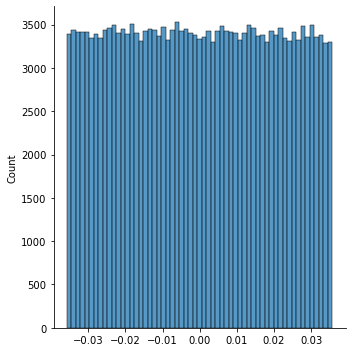

In [11]:
layer = LinearLayer(28 * 28, 256, init_xavier_input)

sns.displot(layer.weights.flatten());

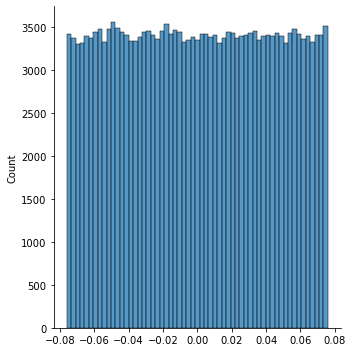

In [12]:
layer = LinearLayer(28 * 28, 256, init_xavier_input_output)

sns.displot(layer.weights.flatten());

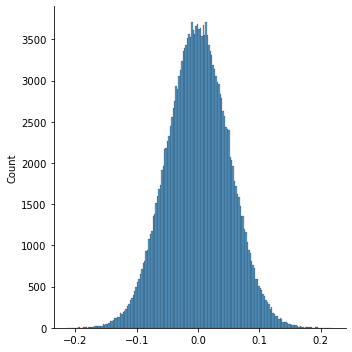

In [13]:
layer = LinearLayer(28 * 28, 256, init_he_input)

sns.displot(layer.weights.flatten());

In [1]:
from torch.optim.lr_scheduler import LinearLR, ExponentialLR, CosineAnnealingLR, ReduceLROnPlateau

In [5]:
ReduceLROnPlateau?

Init signature:
ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.1,
    patience=10,
    threshold=0.0001,
    threshold_mode='rel',
    cooldown=0,
    min_lr=0,
    eps=1e-08,
    verbose=False,
)
Docstring:     
Reduce learning rate when a metric has stopped improving.
Models often benefit from reducing the learning rate by a factor
of 2-10 once learning stagnates. This scheduler reads a metrics
quantity and if no improvement is seen for a 'patience' number
of epochs, the learning rate is reduced.

Args:
    optimizer (Optimizer): Wrapped optimizer.
    mode (str): One of `min`, `max`. In `min` mode, lr will
        be reduced when the quantity monitored has stopped
        decreasing; in `max` mode it will be reduced when the
        quantity monitored has stopped increasing. Default: 'min'.
    factor (float): Factor by which the learning rate will be
        reduced. new_lr = lr * factor. Default: 0.1.
    patience (int): Number of epochs with no improvement after
 